In [1]:
import numpy as np
import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def loader_data():
        
    # STATS
    # reading from keys
    with open("results/keys_stats_und.txt", "r") as f:
        keys = eval(f.read())

    stats = {}
    # reading dataframes
    for key in keys:
        stats[key] = pd.read_csv("results/stats_und_{}.csv".format(str(key)))
        
    # DATA
    # reading from keys
    with open("results/keys_data_und.txt", "r") as f:
        keys = eval(f.read())

    data = {}
    # reading dataframes
    for key in keys:
        data[key] = [pd.read_csv("results/data_und_metrics.csv"), pd.read_csv("results/data_und_levels.csv")]

    return stats, data

In [4]:
stats, data = loader_data()

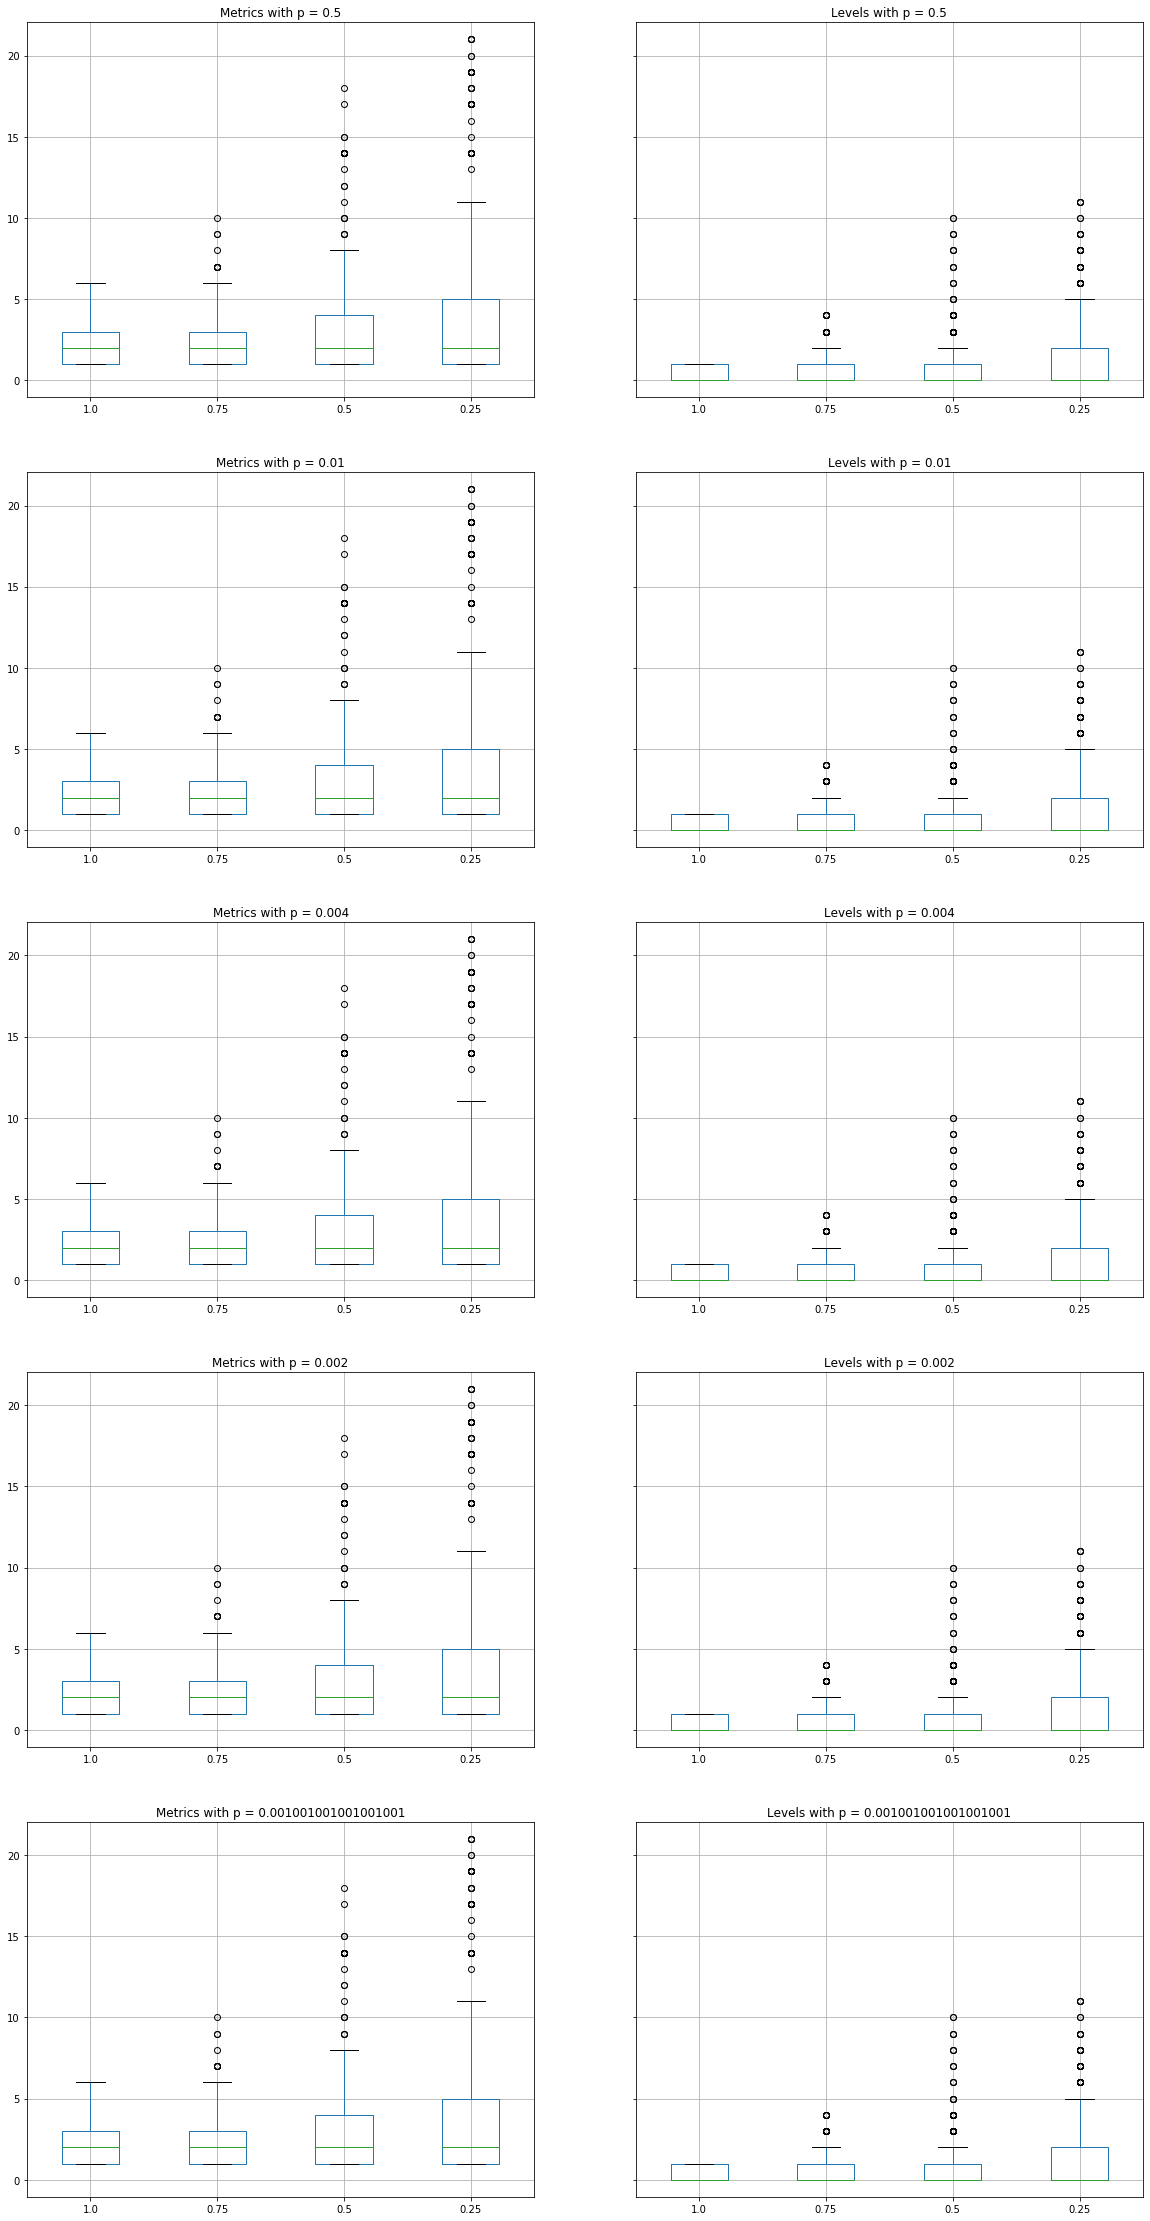

In [5]:
fig, axs = plt.subplots(5,2,figsize = (20,40),sharey = True)
for i, k in enumerate(data.keys()):
    _ = axs[i,0].set_title('Metrics with p = {}'.format(k))
    _ = data[k][0].boxplot(ax = axs[i,0])
    
    _ = axs[i,1].set_title('Levels with p = {}'.format(k))
    _ = data[k][1].boxplot(ax = axs[i,1])

plt.savefig('images/box_undirected.jpeg')